In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Dataset

In [3]:
data = pd.read_csv('car_fuel_efficiency.csv')

In [4]:
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [31]:
n = len(data)
n

9704

In [5]:
cols = ['engine_displacement', 'horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

In [13]:
df = data[cols]

In [15]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

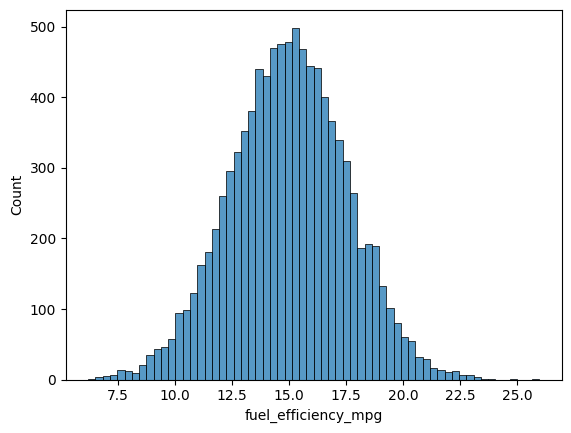

In [18]:
sns.histplot(df.fuel_efficiency_mpg)

### Question 1. Missing values 
There's one column with missing values. What is it?

In [21]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


The column "horsepower" has 8996 which is lower than the length 9704

### Question 2. Median for horse power
What's the median (50% percentile) for variable 'horsepower'?

In [24]:
df.horsepower.median()

np.float64(149.0)

#### Prepare and split the dataset

In [32]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

Shuffle the dataset (the filtered one you created above), use seed 42.

In [29]:
np.random.seed(42)
np.random.shuffle(idx)

Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [33]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [34]:
n_train, n_val, n_test

(5824, 1940, 1940)

In [35]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [40]:
y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

In [64]:
y_train_log = np.log1p(df_train.fuel_efficiency_mpg)
y_val_log = np.log1p(df_val.fuel_efficiency_mpg)
y_test_log = np.log1p(df_test.fuel_efficiency_mpg)

### Question 3. Filling NAs

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Filling missing values in Horsepower with 0s

In [45]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [46]:
# Creating a function to prepare X
def prepare_X(df,missing_values=0):
    df_num = df.copy()
    
    df_num = df_num.fillna(missing_values)
    X = df_num.values
    return X

In [47]:
# Code for training a linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)

    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

In [57]:
# Fitting the model after filling null values with zero
X_train = prepare_X(df_train,0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred), round(rmse(y_val, y_pred),2)

(np.float64(4.811821820654929e-10), np.float64(0.0))

In [65]:
# Fitting the model after filling null values with zero
X_train = prepare_X(df_train,0)
w0, w = train_linear_regression(X_train, y_train_log)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val_log, y_pred), round(rmse(y_val_log, y_pred),2)

(np.float64(0.019340275384617536), np.float64(0.02))

Fitting the model after filling NAs with mean value

In [53]:
mean_val = df_train.horsepower.mean()
mean_val

np.float64(149.5524800297232)

In [66]:
# Fitting the model after filling null values with mean
X_train = prepare_X(df_train,mean_val)
w0, w = train_linear_regression(X_train, y_train_log)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val_log, y_pred), round(rmse(y_val_log, y_pred),2)

(np.float64(0.01934788010830942), np.float64(0.02))

### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [59]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)

    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

In [63]:
for r in [0.0, 0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train,0) # Filling NAs with zeros
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    print(r, w0, round(score,2))

0.0 5.415756731963484e-10 0.0
1e-07 1.6737757846385648e-09 0.0
0.0001 1.77632392706073e-06 0.0
0.001 1.7510924152475127e-05 0.0
0.01 0.00015325946744582097 0.0
0.1 0.0006818103096861705 0.0
1 0.0010402017902242378 0.0
10 0.0010920570489709736 0.0


In [67]:
# Trying with log of y
for r in [0.0, 0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train,0) # Filling NAs with zeros
    w0, w = train_linear_regression_reg(X_train, y_train_log, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val_log, y_pred)
    print(r, w0, round(score,2))

0.0 1.8257495582023573 0.02
1e-07 1.8257466197106744 0.02
0.0001 1.822815904954206 0.02
0.001 1.796831243136623 0.02
0.01 1.5726480868307604 0.02
0.1 0.6997082017946599 0.02
1 0.10687218823099076 0.02
10 0.011347538736628367 0.02
